<a href="https://colab.research.google.com/github/nguyendoanquangnhat/CNN/blob/main/CNN_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import load_img,img_to_array
import numpy as np
from os import listdir
from numpy import asarray,save 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle

food_folder='/content/drive/MyDrive/FOOD'
photos,labels=list(),list()

for file in listdir(food_folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('banhmi'):
       output=1
     elif file.startswith('banhtieu'):
       output=2
     elif file.startswith('banhxeo'):
       output=3
     elif file.startswith('bunbo'):
       output=4
     elif file.startswith('bunrieu'):
       output=5
     elif file.startswith('chetroinuoc'):
       output=6  
     elif file.startswith('comhen'):
       output=7  
     elif file.startswith('comtam'):
       output=8 
     elif file.startswith('pho'):
       output=9  
     elif file.startswith('thitkho'):
       output=10    
     photo=load_img(food_folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('food_photos.npy',photos)
save('food_labels.npy',labels)

(100, 200, 200, 3) (100,)


In [2]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels), file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [3]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (80, 200, 200, 3)
X_test: (20, 200, 200, 3)
y_train: (80, 10)
y_test: (20, 10)


In [4]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses
from numpy.ma.core import reshape
   
classes=10

X_train= X_train.astype('float32')/255
X_test= X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [5]:
batch_size=16
epochs=20   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 7.3465 - accuracy: 0.0750
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 2.5054 - accuracy: 0.0625
Epoch 3/20
5/5 [==============================] - 9s 2s/step - loss: 2.2544 - accuracy: 0.2375
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 2.2303 - accuracy: 0.1250
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 2.0839 - accuracy: 0.2125
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 1.7236 - accuracy: 0.4750
Epoch 7/20
5/5 [==============================] - 8s 1s/step - loss: 1.2069 - accuracy: 0.6875
Epoch 8/20
5/5 [==============================] - 9s 2s/step - loss: 0.7690 - accuracy: 0.7875
Epoch 9/20
5/5 [==============================] - 7s 1s/step - loss: 0.4093 - accuracy: 0.9000
Epoch 10/20
5/5 [==============================] - 10s 2s/step - loss: 0.1695 - accuracy: 0.9625
Epoch 11/20
5/5 [==============================

In [6]:
model.save("/content/drive/MyDrive/AI/cnn_food.h5")

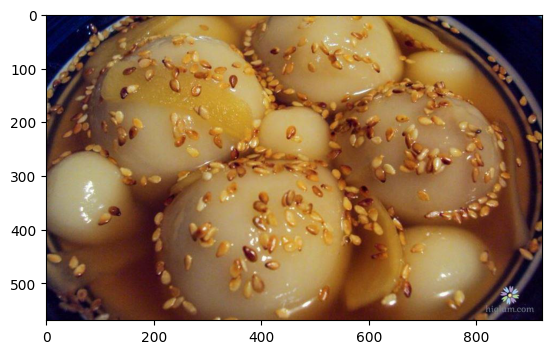

In [7]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model("/content/drive/MyDrive/AI/cnn_food.h5")
img=load_img('/content/drive/MyDrive/FOOD/chetroinuoc9.jpg')
plt.imshow(img)
plt.show()

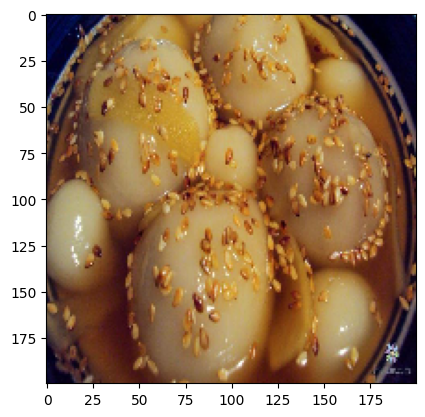

In [8]:
img=load_img('/content/drive/MyDrive/FOOD/chetroinuoc9.jpg',target_size=(200,200))
plt.imshow(img)

In [9]:
class_name = ['BÁNH MÌ','BÁNH TIÊU','BÁNH XÈO','BÚN BÒ','BÚN RIÊU','CHÈ TRÔI NƯỚC','CƠM HẾN','CƠM TẤM','PHỞ','THỊT KHO TRỨNG']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("ĐÂY LÀ MÓN:", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 130ms/step
ĐÂY LÀ MÓN: CHÈ TRÔI NƯỚC [2.1654894e-04 1.2252052e-04 5.7269027e-04 1.7148730e-03 4.3986805e-04
 9.9549413e-01 2.8406746e-05 4.4373059e-04 6.1890696e-06 9.6102775e-04]
0.9954941


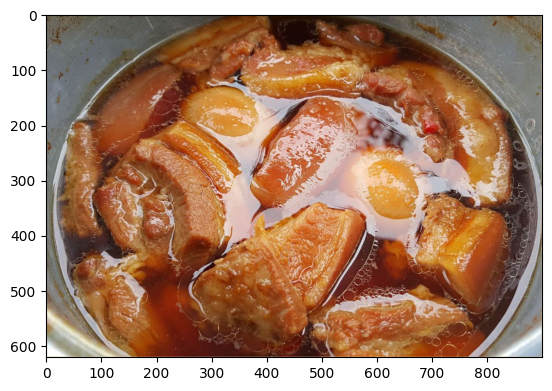

1/1 [==============================] - 0s 129ms/step
ĐÂY LÀ MÓN: THỊT KHO TRỨNG [1.5128324e-04 5.1475210e-05 5.7315373e-07 5.9033900e-05 4.0832838e-06
 6.8126847e-06 1.6012818e-04 2.7544197e-04 1.6521267e-07 9.9929106e-01]
0.99929106


In [10]:
img1=load_img('/content/drive/MyDrive/FOOD/thitkho3.jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/FOOD/thitkho3.jpg',target_size=(200,200))
#plt.imshow(img1)

img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("ĐÂY LÀ MÓN:", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))